# Script programming (laboratory 04)

## Matplotlib

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 Laboratory 05.ipynb
+-- 📜 Task1.py
+-- 📜 Task2.py
+-- 📜 Task3.py
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your `.ipynb` file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.



## Task 1 (meshgrid)

**Warning: It is recommended to perform all of the tasks of this laboratory in separate python files (`*.py`) because Jupyter sometimes doen't show properly the charts with animation or events.**

Fill in the below code using `contourf` i `contour` functions. The generated chart should look like below:

<img style="height:200px" src="Laboratory 05_Figure_1.png" />

*Tip: check out the `np.meshgrid` function.*

```python
import numpy as np
import matplotlib.pyplot as plt

def f(x,y): return 0.5*np.sin(x**3) + 0.25*np.sin((y + np.pi)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(-np.pi,np.pi/2,n)

# >> FILL IN <<
```

## Task 2 (animation)

Add an animation to previous task by using the `matplotlib.animation.FuncAnimation` function.

<img style="height:200px" src="Laboratory 05_Figure_2.gif" />

1. Write a function which generates the chart in particular time step ($i$). Example to fill:
```python
def animate(i):
    # show the chart in step i
```

2. Then add the animation do chart as follows:
```python
matplotlib.animation.FuncAnimation(fig, animate, frames=80, interval=100, repeat=False)
```

3. You may use the below template to complete this task (please fill in the gaps):

```python
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

def f(x, y, t): return 0.5*np.sin(x**3) + 0.25*np.sin((y - t)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(0,np.pi*1.5,n)

res = [[f(xx, yy, 0) for xx in x] for yy in y]

X,Y = np.meshgrid(x,y)

fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlim(-np.pi/2,np.pi/2)
ax.set_ylim(0,np.pi*1.5)

# >> FILL IN (display the chart using `contourf` i `contour` functions) <<

def animate(i):
    # >> FILL IN <<

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=80, interval=100, repeat=False) 
plt.show()
```

## Task 3 (3D).

Display the chart from task 1 in 3D using `plot_surface` function. To achieve the same results as shown in the image, use parameter `cmap="gist_ncar"`.

<img style="height:200px" src="Laboratory 05_Figure_3.png" />

*Tip: You need to import following: `import mpl_toolkits.mplot3d.axes3d as p3`*

Useful functions:
* `ax = p3.Axes3D(fig)`
* `ax.set_xlim3d([-np.pi/2,np.pi/2])` - for x
* `ax.set_ylim3d([0,np.pi*1.5])` - for y



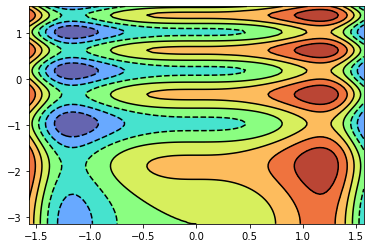

In [5]:
#Task1
import numpy as np
import matplotlib.pyplot as plt

def f(x,y): 
    return 0.5*np.sin(x**3) + 0.25*np.sin((y + np.pi)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(-np.pi,np.pi/2,n)
origin = 'lower'
[X,Y]=np.meshgrid(x,y)
z=f(X,Y)

assert len(z) == len(X*Y)

plt.figure()


M1=plt.contourf(X,Y,z,
             cmap='turbo',
             origin=origin,
             alpha=0.8)
M2=plt.contour(M1,
               colors='k',
               origin=origin)

plt.savefig("Task1_fig.png")
plt.show()


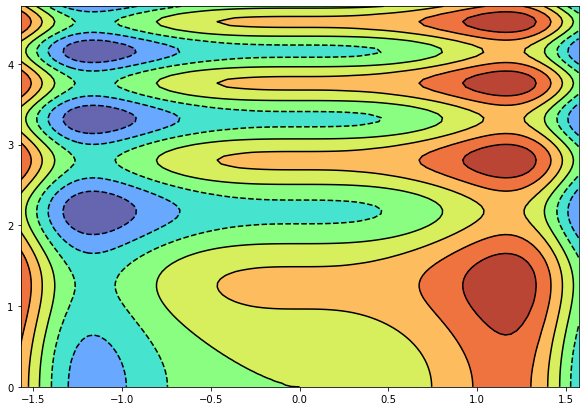

In [4]:
#Task2
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

def f(x, y, t): return 0.5*np.sin(x**3) + 0.25*np.sin((y - t)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(0,np.pi*1.5,n)

res = [[f(xx, yy, 0) for xx in x] for yy in y]

X,Y = np.meshgrid(x,y)

fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlim(-np.pi/2,np.pi/2)
ax.set_ylim(0,np.pi*1.5)



M1=plt.contourf(X,Y,z,
             cmap='turbo',
             alpha=0.8)
M2=plt.contour(M1,
               colors='k')


def animate(i):
    
    ax.clear()
    z=f(X,Y,i)
    ax.contourf(M1[:,:,z])
    return ax

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=80, interval=100, repeat=False) 
plt.show()

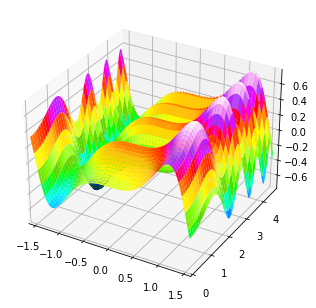

In [6]:
#Task3
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

def f(x,y): 
    return 0.5*np.sin(x**3) + 0.25*np.sin((y + np.pi)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(-np.pi,np.pi/2,n)

[X,Y]=np.meshgrid(x,y)
z=f(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = p3.Axes3D(fig)
M=ax.plot_surface(X,Y+(np.pi),z,cmap='gist_ncar')
ax.set_xlim3d([-np.pi/2,np.pi/2])
ax.set_ylim3d([0,np.pi*1.5])

plt.show()